In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import zipfile

# # Specify the path to your zip file
# zip_path = '/content/drive/MyDrive/AML/Challenge1/eurecom-aml-2024-challenge-1.zip'

# # Create a ZipFile Object and load the zip file
# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     # Extract all the files
#     zip_ref.extractall('/content/drive/MyDrive/AML/Challenge1/dataset/')


In [ ]:
import numpy as np
import pandas as pd
import os

import cv2
import matplotlib.pyplot as plt
%matplotlib inline

from skimage import color

In [ ]:
# Data path
labels = pd.read_csv('/content/drive/MyDrive/AML/Challenge1/dataset/train.csv')
sub = pd.read_csv('/content/drive/MyDrive/AML/Challenge1/dataset/sample_submission.csv')
train_path = '/content/drive/MyDrive/AML/Challenge1/dataset/train/train/'
test_path = '/content/drive/MyDrive/AML/Challenge1/dataset/test/test/'

In [ ]:
# print('Num train samples:{0}'.format(len(os.listdir(train_path))))
# print('Num test samples:{0}'.format(len(os.listdir(test_path))))

Num train samples:17500
Num test samples:4000


In [ ]:
labels['has_cactus'].value_counts()

has_cactus
1    13136
0     4364
Name: count, dtype: int64

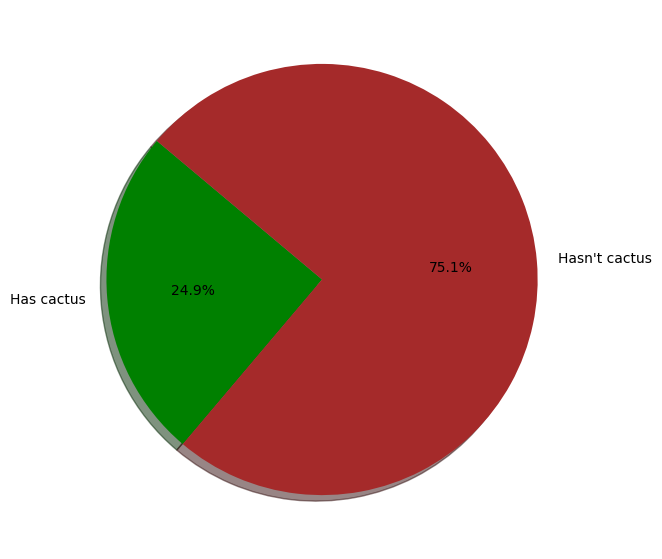

In [ ]:
lab = 'Has cactus','Hasn\'t cactus'
colors=['green','brown']

plt.figure(figsize=(7,7))
plt.pie(labels.groupby('has_cactus').size(), labels=lab,
        labeldistance=1.1, autopct='%1.1f%%',
        colors=colors,shadow=True, startangle=140)
plt.show()

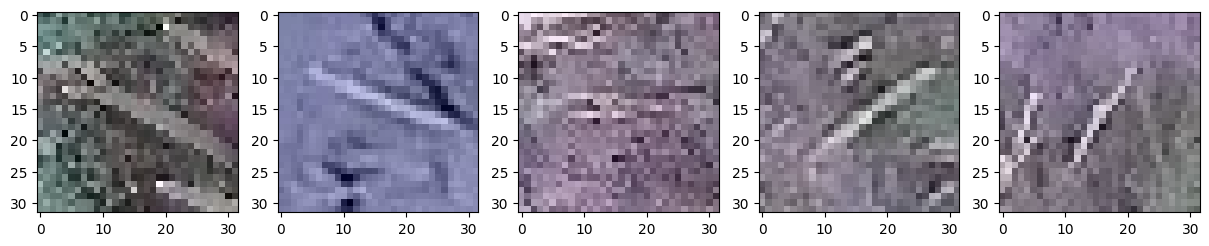

In [ ]:
fig,ax = plt.subplots(1,5,figsize=(15,3))

for i, idx in enumerate(labels[labels['has_cactus']==1]['id'][-5:]):
  path = os.path.join(train_path,idx)
  ax[i].imshow(cv2.imread(path))

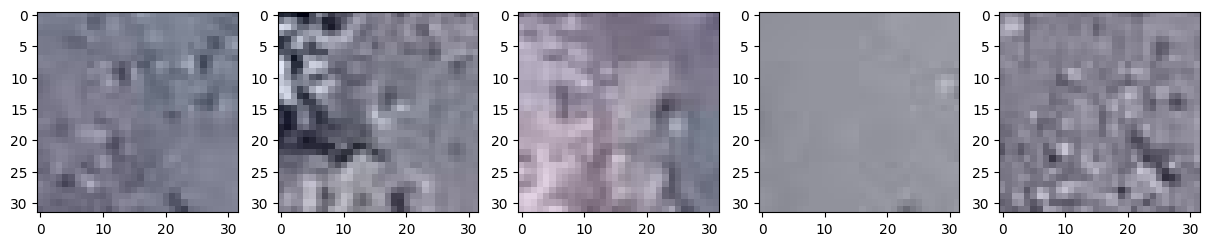

In [ ]:
fig,ax = plt.subplots(1,5,figsize=(15,3))

for i, idx in enumerate(labels[labels['has_cactus']==0]['id'][-5:]):
  path = os.path.join(train_path,idx)
  ax[i].imshow(cv2.imread(path))

In [ ]:
has_cactus=[]
for i, idx in enumerate(labels[labels['has_cactus']==1]['id'][-2:]):
  path = os.path.join(train_path,idx)
  has_cactus.append(path)

In [ ]:
no_cactus=[]
for i, idx in enumerate(labels[labels['has_cactus']==0]['id'][-2:]):
  path = os.path.join(train_path,idx)
  no_cactus.append(path)

In [ ]:
no_cactus_image=cv2.imread(no_cactus[0])
cactus_image=cv2.imread(has_cactus[0])

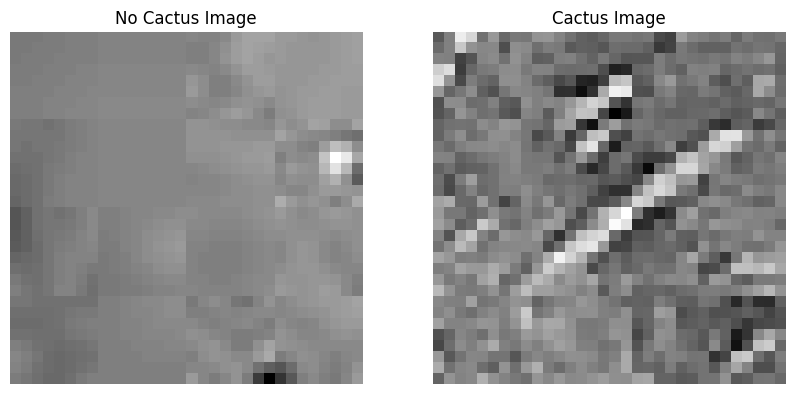

In [ ]:
import matplotlib.pyplot as plt
from skimage import color

# Assuming no_cactus_image and cactus_image are already defined color images.
no_cactus_image_gray = color.rgb2gray(no_cactus_image)
cactus_image_gray = color.rgb2gray(cactus_image)

# Set up the matplotlib figure and axes.
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# Plot the first image
axes[0].imshow(no_cactus_image_gray, cmap='gray')
axes[0].set_title('No Cactus Image')
axes[0].axis('off')  # Turn off the axis.

# Plot the second image
axes[1].imshow(cactus_image_gray, cmap='gray')
axes[1].set_title('Cactus Image')
axes[1].axis('off')  # Turn off the axis.

plt.show()


In [ ]:
grayimg_no_cactus = cv2.cvtColor(no_cactus_image,cv2.COLOR_BGR2GRAY)
grayimg_cactus = cv2.cvtColor(cactus_image,cv2.COLOR_BGR2GRAY)

New Image Shape (32, 32)


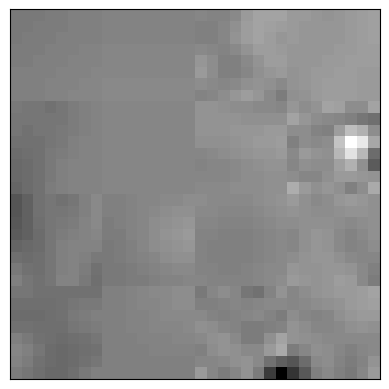

In [ ]:
plt.imshow(grayimg_no_cactus,cmap='gray') #cmap has been used as matplotlib uses some default colormap to plot grayscale images
plt.xticks([]) #To get rid of the x-ticks and y-ticks on the image axis
plt.yticks([])
print('New Image Shape',grayimg_no_cactus.shape)

New Image Shape (32, 32)


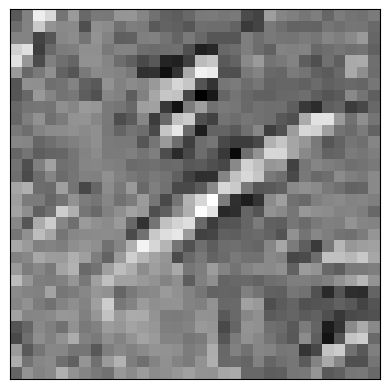

In [ ]:
plt.imshow(grayimg_cactus,cmap='gray') #cmap has been used as matplotlib uses some default colormap to plot grayscale images
plt.xticks([]) #To get rid of the x-ticks and y-ticks on the image axis
plt.yticks([])
print('New Image Shape',grayimg_cactus.shape)

In [ ]:
#Finding optimal threshold
from skimage.filters import threshold_otsu
thresh_val_cactus = threshold_otsu(grayimg_cactus)
thresh_val_no_cactus= threshold_otsu(grayimg_no_cactus)
print('The optimal seperation value for cacatus is',thresh_val_cactus)
print('The optimal seperation value for no cactus is',thresh_val_no_cactus)

The optimal seperation value for cacatus is 124
The optimal seperation value for no cactus is 152


In [ ]:
from matplotlib import pyplot as plt

def show_image(image, title='Image', cmap_type='gray'):
  plt.imshow(image, cmap=cmap_type)
  plt.title(title)
  plt.axis('off')
  plt.show()

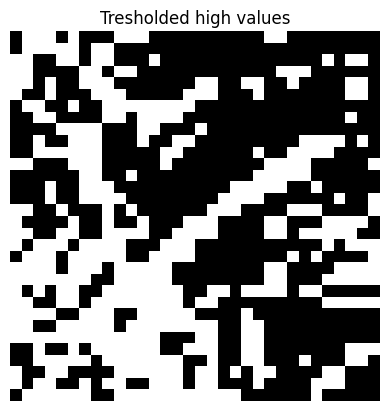

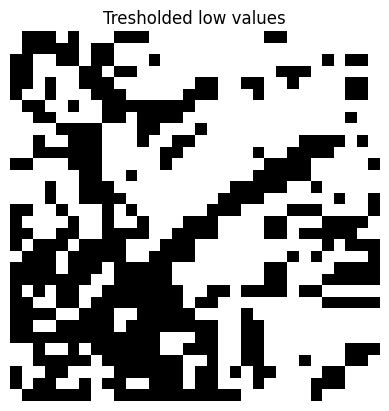

In [ ]:
thresh = 124 # set a random thresh value

binary_high = grayimg_cactus > thresh_val_cactus
binary_low = grayimg_cactus <= thresh_val_cactus

show_image(binary_high, 'Tresholded high values')
show_image(binary_low, 'Tresholded low values')

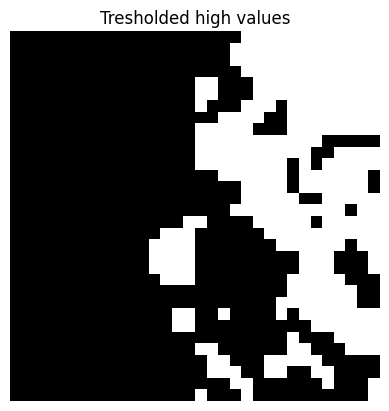

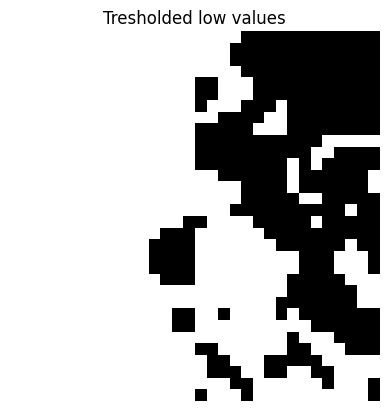

In [ ]:
thresh = 152 # set a random thresh value
binary_high = grayimg_no_cactus > thresh_val_no_cactus
binary_low = grayimg_no_cactus <= thresh_val_no_cactus

show_image(binary_high, 'Tresholded high values')
show_image(binary_low, 'Tresholded low values')

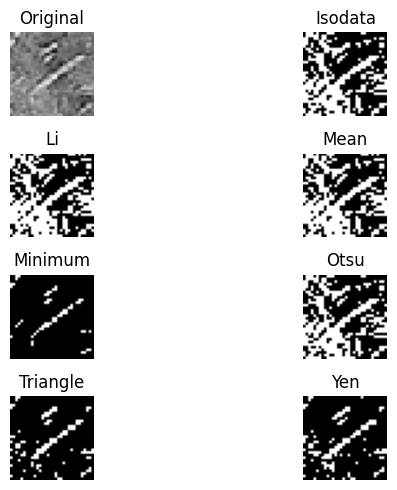

In [ ]:
from skimage.filters import try_all_threshold

fig, ax = try_all_threshold(grayimg_cactus, verbose=False)

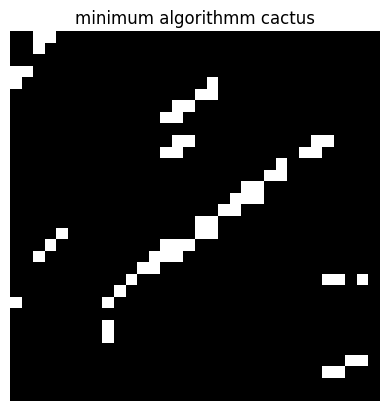

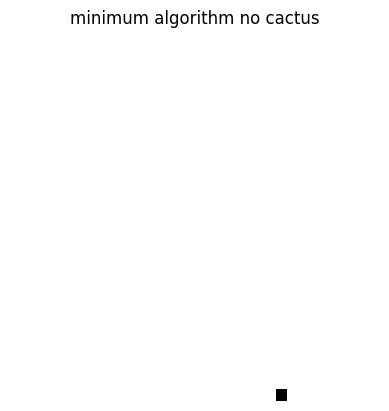

In [ ]:
from skimage.filters import threshold_minimum

thresh = threshold_minimum(grayimg_cactus)

text_binary_minimum_cactus = grayimg_cactus > thresh

show_image(text_binary_minimum_cactus, 'minimum algorithmm cactus')



thresh = threshold_minimum(grayimg_no_cactus)

text_binary_minimum_no_cactus = grayimg_no_cactus > thresh

show_image(text_binary_minimum_no_cactus, 'minimum algorithm no cactus')

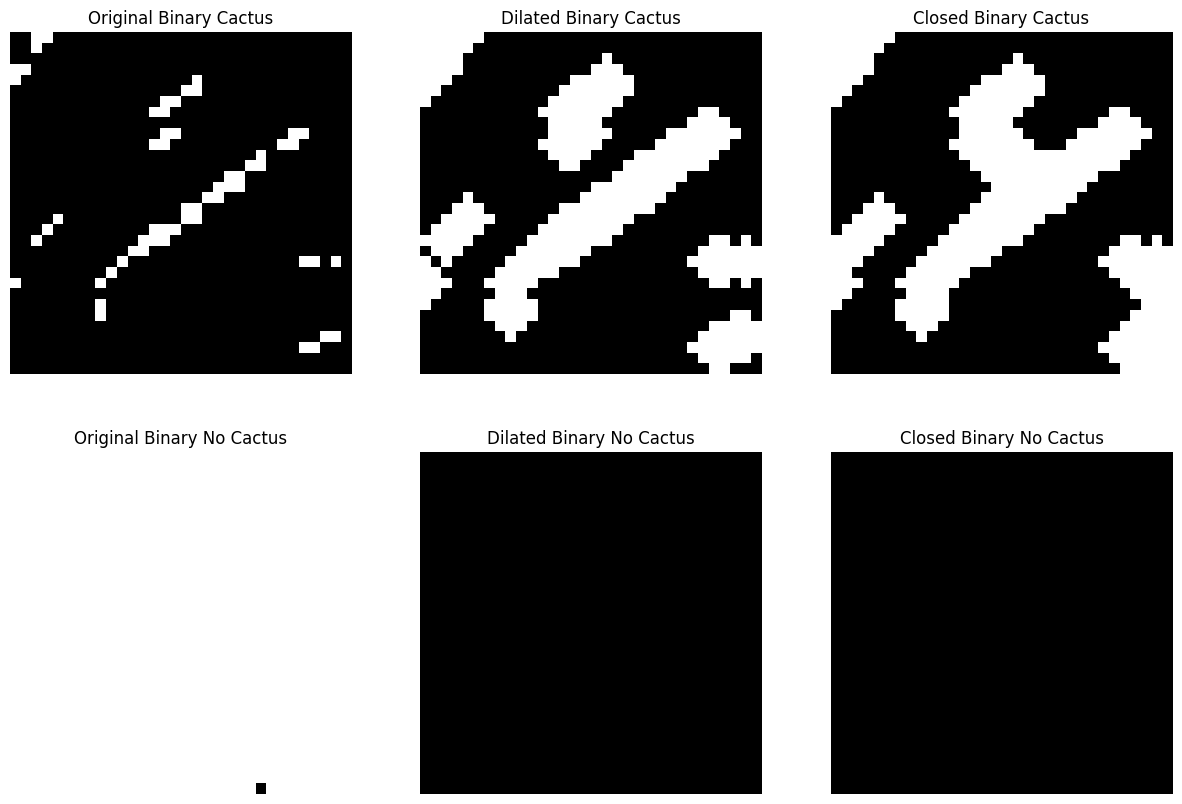

In [ ]:
from skimage.filters import threshold_minimum
from skimage import morphology
import matplotlib.pyplot as plt

# Assuming grayimg_cactus and grayimg_no_cactus are already defined grayscale images.

# Apply minimum thresholding
thresh_cactus = threshold_minimum(grayimg_cactus)
binary_cactus = grayimg_cactus > thresh_cactus

thresh_no_cactus = threshold_minimum(grayimg_no_cactus)
binary_no_cactus = grayimg_no_cactus > thresh_no_cactus

# Apply dilation to enhance object connectivity
dilated_cactus = morphology.dilation(binary_cactus, morphology.disk(2))
dilated_no_cactus = morphology.dilation(binary_no_cactus, morphology.disk(2))

# Apply morphological closing to further enhance connectivity and close small holes
closed_cactus = morphology.closing(dilated_cactus, morphology.disk(2))
closed_no_cactus = morphology.closing(dilated_no_cactus, morphology.disk(2))

# Optionally, remove small objects if necessary
cleaned_cactus = morphology.remove_small_objects(closed_cactus, min_size=15)
cleaned_no_cactus = morphology.remove_small_objects(closed_no_cactus, min_size=15)

# Show the images
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax[0, 0].imshow(binary_cactus, cmap='gray')
ax[0, 0].set_title('Original Binary Cactus')
ax[0, 0].axis('off')

ax[0, 1].imshow(dilated_cactus, cmap='gray')
ax[0, 1].set_title('Dilated Binary Cactus')
ax[0, 1].axis('off')

ax[0, 2].imshow(closed_cactus, cmap='gray')
ax[0, 2].set_title('Closed Binary Cactus')
ax[0, 2].axis('off')

ax[1, 0].imshow(binary_no_cactus, cmap='gray')
ax[1, 0].set_title('Original Binary No Cactus')
ax[1, 0].axis('off')

ax[1, 1].imshow(dilated_no_cactus, cmap='gray')
ax[1, 1].set_title('Dilated Binary No Cactus')
ax[1, 1].axis('off')

ax[1, 2].imshow(closed_no_cactus, cmap='gray')
ax[1, 2].set_title('Closed Binary No Cactus')
ax[1, 2].axis('off')

plt.show()


In [ ]:
def plot_comparison(original, filtered, title_filtered):
  fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 6), sharex=True, sharey=True)
  ax1.imshow(original, cmap=plt.cm.gray)
  ax1.set_title('original')
  ax1.axis('off')
  ax2.imshow(filtered, cmap=plt.cm.gray)
  ax2.set_title(title_filtered)
  ax2.axis('off')

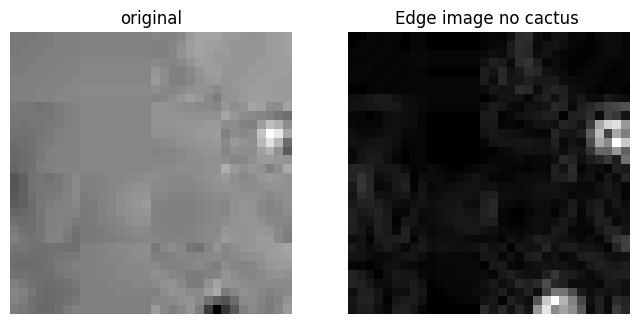

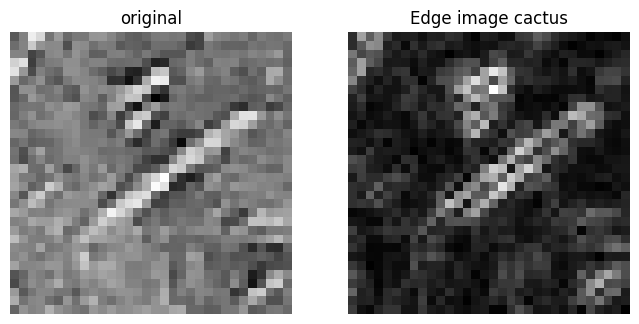

In [ ]:
from skimage.filters import sobel

edge_image = sobel(grayimg_no_cactus) # apply the filter

plot_comparison(grayimg_no_cactus, edge_image, 'Edge image no cactus ')


edge_image = sobel(grayimg_cactus) # apply the filter

plot_comparison(grayimg_cactus, edge_image, 'Edge image cactus')

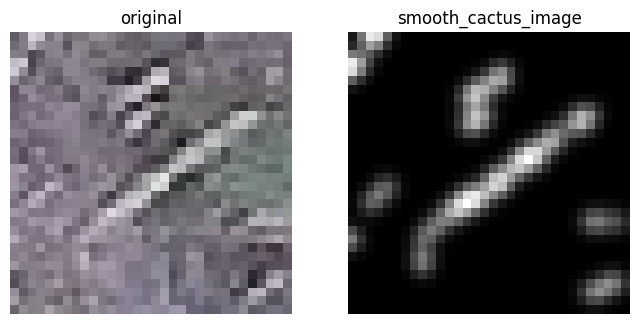

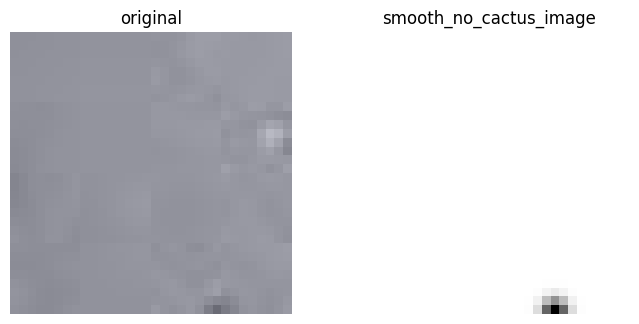

In [ ]:
from skimage.filters import gaussian
smooth_cactus_image = gaussian(text_binary_minimum_cactus) # you have to specify the multichannel

plot_comparison(cactus_image, smooth_cactus_image, 'smooth_cactus_image')

smooth_no_cactus_image = gaussian(text_binary_minimum_no_cactus) # you have to specify the multichannel

plot_comparison(no_cactus_image, smooth_no_cactus_image, 'smooth_no_cactus_image')

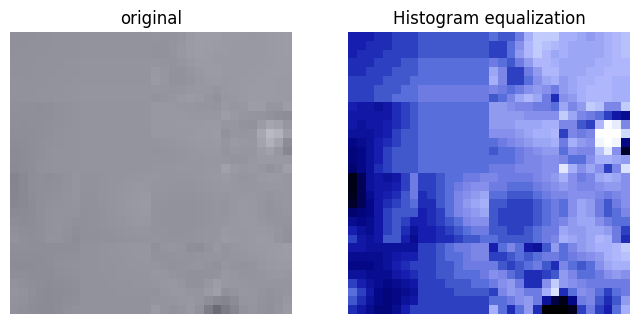

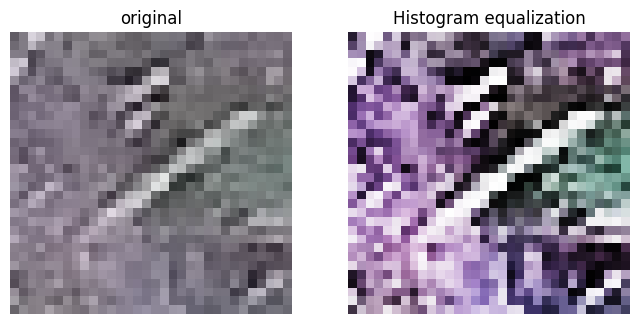

In [ ]:
from skimage import exposure
equalized_cactus_image = exposure.equalize_hist(cactus_image)
equalized_no_cactus_image = exposure.equalize_hist(no_cactus_image)
plot_comparison(no_cactus_image, equalized_no_cactus_image, 'Histogram equalization')
plot_comparison(cactus_image, equalized_cactus_image, 'Histogram equalization')

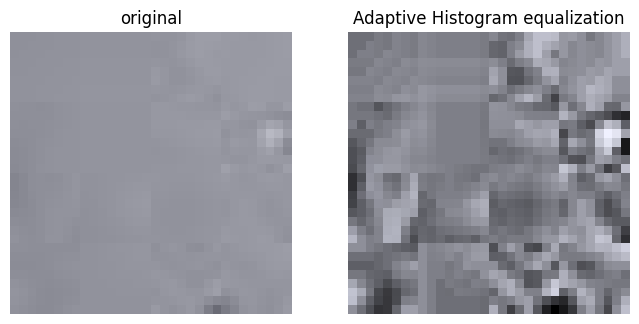

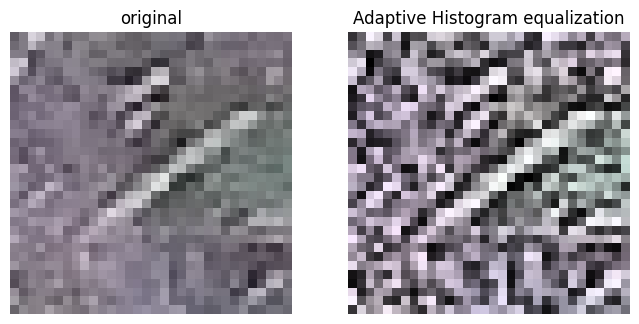

In [ ]:
from skimage import exposure

adapthits_leag_image = exposure.equalize_adapthist(no_cactus_image)

plot_comparison(no_cactus_image, adapthits_leag_image, 'Adaptive Histogram equalization')


adapthits_leag_image = exposure.equalize_adapthist(cactus_image)

plot_comparison(cactus_image, adapthits_leag_image, 'Adaptive Histogram equalization')

In [ ]:
def show_image_contour(image, contours):
    plt.figure()
    for n, contour in enumerate(contours):
        plt.plot(contour[:, 1], contour[:, 0], linewidth=3)
    plt.imshow(image, interpolation='nearest', cmap='gray_r')
    plt.title('Contours')
    plt.axis('off')
    plt.show()

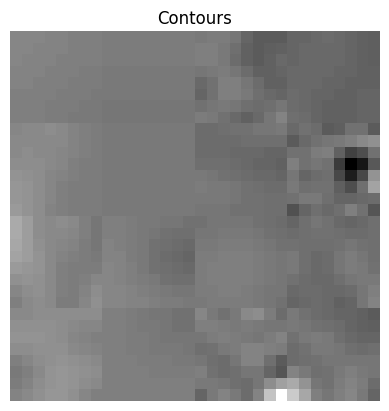

In [ ]:
from skimage import measure



contours_gray_image = measure.find_contours(grayimg, 0.8)

show_image_contour(grayimg, contours_gray_image)

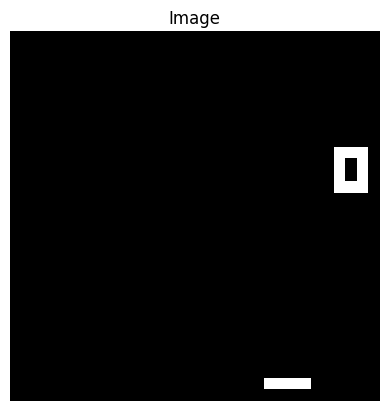

In [ ]:
from skimage.feature import canny
canny_leaf_image = canny(grayimg)

show_image(canny_leaf_image)